In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define image size and other parameters
path = '/home/giacomo/git/Tittarelli_Giacomo_RetiNeurali/chest_xray/chest_xray/'
dimension = 50
resize = 34
img_width, img_height = resize, resize
batchsize = 32
num_of_class = 2

# Load image data using the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0  # Rescale pixel values to [0, 1]
)

train_data_gen = datagen.flow_from_directory(
    directory=path + 'train',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',
    shuffle=True
)

val_data_gen = datagen.flow_from_directory(
    directory=path + 'val',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',
    shuffle=False
)

test_data_gen = datagen.flow_from_directory(
    directory=path + 'test',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model = keras.Sequential([
    Conv2D(filters=8, kernel_size=(7, 7), padding='same', activation='relu', input_shape=(resize, resize, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_of_class, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=epochs,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=6)]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data_gen)
print("Test accuracy:", test_acc)


2023-08-21 17:38:57.545900: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 17:38:57.588837: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 17:38:57.589649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 17:38:58.469702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/20
  1/163 [..............................] - ETA: 2:33 - loss: 0.9349 - accuracy: 0.2188

2023-08-21 17:39:00.606203: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18284544 exceeds 10% of free system memory.
2023-08-21 17:39:00.606315: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18284544 exceeds 10% of free system memory.
2023-08-21 17:39:00.608240: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27744000 exceeds 10% of free system memory.
2023-08-21 17:39:00.608344: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27744000 exceeds 10% of free system memory.
2023-08-21 17:39:00.617080: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29908032 exceeds 10% of free system memory.


163/163 [==============================] - 50s 303ms/step - loss: 0.5982 - accuracy: 0.7053 - val_loss: 0.8220 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 48s 293ms/step - loss: 0.5202 - accuracy: 0.7523 - val_loss: 0.7218 - val_accuracy: 0.5625
Epoch 3/20
163/163 [==============================] - 47s 289ms/step - loss: 0.3866 - accuracy: 0.8357 - val_loss: 0.7167 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 48s 293ms/step - loss: 0.3108 - accuracy: 0.8698 - val_loss: 0.8013 - val_accuracy: 0.6250
Epoch 5/20
163/163 [==============================] - 48s 294ms/step - loss: 0.2731 - accuracy: 0.8840 - val_loss: 0.8978 - val_accuracy: 0.6250
Epoch 6/20
163/163 [==============================] - 49s 299ms/step - loss: 0.2626 - accuracy: 0.8951 - val_loss: 0.4561 - val_accuracy: 0.8750
Epoch 7/20
163/163 [==============================] - 49s 299ms/step - loss: 0.2514 - accuracy: 0.8938 - val_loss: 0.7266 - val_accuracy: 0.6

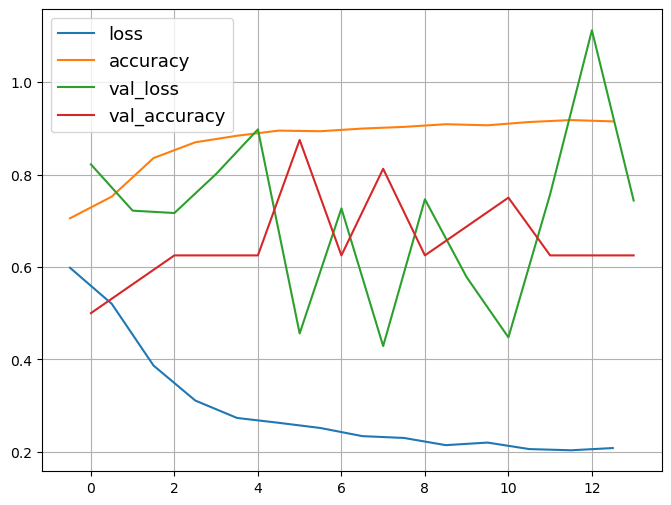

In [2]:
#plot learning curves

fig, ax = plt.subplots(figsize=(8,6))

for metric in history.history:
    
    #subtract half epoch from training data
    if len(metric.split('_')) < 2:
        ax.plot(np.array(history.epoch)-.5, history.history[metric], label=metric)
    else:
        ax.plot(history.epoch, history.history[metric], label=metric)
    
ax.grid()    

ax.legend(fontsize=13);